---
---

<center><h1> Assignment</h1></center>

---
---

#### `Instructions`

* ***You are free to use internet to refer the documentation of any library.***
* ***If required, feel free to import other libraries to do the task required.***
* ***Before making a submission, make sure that your code is commented.***

---


#### `Importing the Required Libraries`

---

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

### `SECTION 1:`

---


***1. From the directory, read `ads.csv` file. Observe the dataframe once read and if it doesn't look fine make appropriate changes to the parameters to read the file.***

---

In [2]:
# read the Ads.csv data in the dataset folder
# loading pandas dataframe from ads.csv
data = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\Python\\assignment 5\\ads.csv", skiprows = 3)

---

***2. Convert the time-based column present in the data to date time format and print the head of the data.***

---

In [7]:
# convert to datetime
data.Time = pd.to_datetime(data.Time)
data.dtypes

Time    datetime64[ns]
Ads              int64
dtype: object

In [8]:
# view the top rows of the data
print(data.head())

                 Time     Ads
0 2017-09-13 00:00:00   80115
1 2017-09-13 01:00:00   79885
2 2017-09-13 02:00:00   89325
3 2017-09-13 03:00:00  101930
4 2017-09-13 04:00:00  121630


---

***3. Use any library to draw a line plot of the Time Series. On `x-axis` show `time` and on `y-axis` show number of `Ads view.`***

---

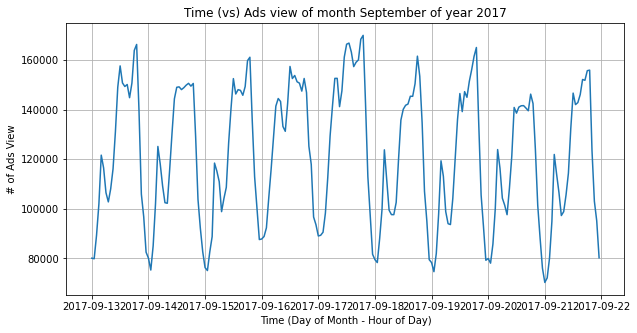

In [26]:
# line plot of time (vs) ads view
plt.figure(figsize=(10,5))
plt.errorbar(data=data, x= 'Time', y='Ads')
plt.title('Time (vs) Ads view of month September of year 2017')
plt.xlabel('Time (Day of Month - Hour of Day)')
plt.ylabel('# of Ads View')
plt.grid()


---

***4. The data given currently is hourly basis. Aggregate the data on the `day wise` in a new data frame and plot the time series.***

---

In [27]:
data.Time.dt.day

0      13
1      13
2      13
3      13
4      13
       ..
211    21
212    21
213    21
214    21
215    21
Name: Time, Length: 216, dtype: int64

In [29]:
# aggregating the data on day wise and creating a new dataframe
day_wise = pd.DataFrame(data.groupby(data.Time.dt.day)['Ads'].sum())

In [30]:
# converting the data frame index 'Time' to a column by resetting index
day_wise.reset_index(inplace=True)

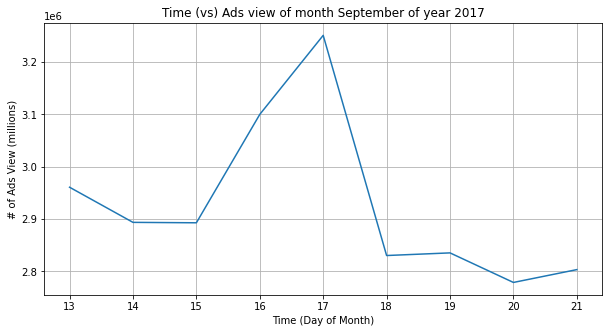

In [32]:
# plotting the time series
plt.figure(figsize=(10,5))
plt.errorbar(data=day_wise, x= 'Time', y='Ads')
plt.title('Time (vs) Ads view of month September of year 2017')
plt.xlabel('Time (Day of Month)')
plt.ylabel('# of Ads View (millions)')
plt.grid()

---

***5. Use the `Time` feature to create 3 new features. `Month`, `Week`, and `is_week_end`. In the feature `is_week_end`, mark it as 1 if the day is `Saturday or Sunday` otherwise mark it as 0.***

---

In [34]:
# creating new features Month, Week, is_week_end
data['Month'] = data.Time.dt.month
data['Week'] = data.Time.dt.week
data['is_week_end'] = data.Time.dt.dayofweek
for index in data.index:
    if (data.loc[index,'Time']).dayofweek in [5,6]:
        data.loc[index, 'is_week_end'] = 1
    else:
        data.loc[index, 'is_week_end'] = 0

data['is_week_end'] = data['is_week_end'].astype(int)
data

,Time,Ads,Month,Week,is_week_end
0,2017-09-13 00:00:00,80115,9,37,0
1,2017-09-13 01:00:00,79885,9,37,0
2,2017-09-13 02:00:00,89325,9,37,0
3,2017-09-13 03:00:00,101930,9,37,0
4,2017-09-13 04:00:00,121630,9,37,0
...,...,...,...,...,...
211,2017-09-21 19:00:00,155890,9,38,0
212,2017-09-21 20:00:00,123395,9,38,0
213,2017-09-21 21:00:00,103080,9,38,0
214,2017-09-21 22:00:00,95155,9,38,0


---

***6. Now, Again plot the time-series that you have plotted in the question 3. Now, Add 2 vertical lines (for Saturday and Sunday)on `weekend dates` in the plot like the following image.***

---

![](images/weekend.png)

---

In [36]:
vlines_pos = data[data.is_week_end == True].Time

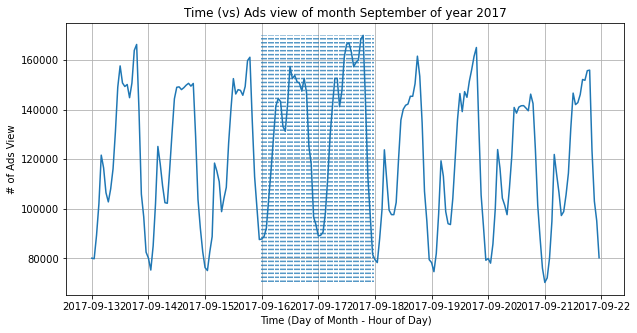

In [38]:
# write your code here
plt.figure(figsize=(10,5))
plt.errorbar(data=data, x= 'Time', y='Ads')
plt.title('Time (vs) Ads view of month September of year 2017')
plt.xlabel('Time (Day of Month - Hour of Day)')
plt.ylabel('# of Ads View')
plt.grid()
plt.vlines(vlines_pos, ymin=data.Ads.min(), ymax=data.Ads.max(), linestyles='dotted');

---

### `SECTION 2:`

---

***Consider the following student dataframe and answer the questions. It is consist of `roll_no`, `name`, `grade`, and `city`.***

---

In [39]:
# create student dataframe
student_df = pd.DataFrame.from_dict({
    'roll_no' : [11, 2, 33, 14, 51, 16],
    'name'    : ['AX', 'BO', 'EC', 'ED', 'ET', 'FY'],
    'grade'   : ['A+', 'B', 'B+', 'A', 'B', 'B+'],
    'city'    : ['gurgaon', 'delhi', 'noida', 'delhi', 'delhi', 'gurgaon']
})
student_df

,roll_no,name,grade,city
0,11,AX,A+,gurgaon
1,2,BO,B,delhi
2,33,EC,B+,noida
3,14,ED,A,delhi
4,51,ET,B,delhi
5,16,FY,B+,gurgaon


---

***7. Sort the dataframe by first city(descending order `{Z-A}`) and then by name.(ascending order `{A-Z}`)***

---

In [40]:
# sorting by city first on descending order and then by name ascending order
student_df.sort_values(['city', 'name'], ascending=[False, True], inplace=True)
student_df


,roll_no,name,grade,city
2,33,EC,B+,noida
0,11,AX,A+,gurgaon
5,16,FY,B+,gurgaon
1,2,BO,B,delhi
3,14,ED,A,delhi
4,51,ET,B,delhi


---

***8. Filter the rows where the city name is `gurgaon`***

---

In [42]:
# filtering the dataframe for city name 'gurgaon'
student_df.loc[student_df['city'] == 'gurgaon']


,roll_no,name,grade,city
0,11,AX,A+,gurgaon
5,16,FY,B+,gurgaon


---

***9. Use the loc function and replace the city name `gurgaon` with `gurugram`.***

---

In [44]:
# replace the city name gurgaon with gurugram
# resetting the index as we sorted the dataframe before
student_df.reset_index(drop=True, inplace=True)

for index in student_df.index:
    if student_df.loc[index, 'city'] == 'gurgaon':
        student_df.loc[index, 'city'] = 'gurugram'

In [45]:
# view the data
student_df

,roll_no,name,grade,city
0,33,EC,B+,noida
1,11,AX,A+,gurugram
2,16,FY,B+,gurugram
3,2,BO,B,delhi
4,14,ED,A,delhi
5,51,ET,B,delhi


---

***Now, we have created another dataframe `favorite_subject_df` which has student `roll_no` and `favorite_subject`***

---

In [46]:
# create the dataframe
favorite_subject_df = pd.DataFrame.from_dict({
    'Roll_no' : [ 2, 14, 15, 5, 11, 33, 51, 55, 16],
    'favorite_subject' : ['Maths', 'Science', 'Science', 'Physics', 'Maths', 
                          'Computer', 'English', 'Maths', 'Biology']
})
favorite_subject_df

,Roll_no,favorite_subject
0,2,Maths
1,14,Science
2,15,Science
3,5,Physics
4,11,Maths
5,33,Computer
6,51,English
7,55,Maths
8,16,Biology


---

***10. Use to appropriate join to add the favorite subject to the student dataframe.***

---

In [48]:
# joining favorite subject to student_df dataframe
favorite_subject_df.rename(columns={'Roll_no': 'roll_no'}, inplace=True)
student_df = student_df.merge(favorite_subject_df, how='left', on='roll_no')

# viewing newly merged student_df
student_df

,roll_no,name,grade,city,favorite_subject_x,favorite_subject_y
0,33,EC,B+,noida,Computer,Computer
1,11,AX,A+,gurugram,Maths,Maths
2,16,FY,B+,gurugram,Biology,Biology
3,2,BO,B,delhi,Maths,Maths
4,14,ED,A,delhi,Science,Science
5,51,ET,B,delhi,English,English


---
### `SECTION 3:`

---

***Now, we will read the titanic dataset.***

---

In [51]:
# read the dataset
titanic_data = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\Python\\assignment 5\\titanic.csv")

In [52]:
# view the top rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


---

***11. Find the total number of passengers `Survived and Not Survived` for each category in `Sex` using a groupby or pivot table.***

---

In [53]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
# Number of passengers survived and not survived for each category
titanic_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

***12. In the `Name` column there is a pattern in the title of the person like `Mr, Mrs, Miss`. Use this pattern and create new feature as the `title` using the lambda expressions.***

---

In [55]:
# creating a new feature called title
titanic_data['title'] = titanic_data.Name.apply(lambda x: x.split('.')[0])
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,Miss
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,Mr


---

***13. Find out the total number of passengers with each title(feature created in last step).***

----

In [56]:
# write your code here
# Number of passesngers with each title
titanic_data.title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Ms                1
 Sir               1
 Capt              1
 Don               1
 Mme               1
 Jonkheer          1
 Lady              1
 the Countess      1
Name: title, dtype: int64

---

***14. Create a new column `age_bins`. Divide the age into 4 different categories `0-20`, `20-40`, `40-60`, `60+`***

---

In [58]:
# creating new feature 'age_bins'
def age_groups(age):
    if str(age) != 'nan':
        if age > 60:
            return '60+'
        elif age > 40 and age <= 60:
            return '40-60'
        elif age > 20 and age <= 40:
            return '20-40'
        else:
            return '0-20'
    else:
        return age
    
titanic_data['age_bins'] = titanic_data.Age.apply(lambda x : age_groups(x))


titanic_data.sample(10)[['Age', 'age_bins']]

,Age,age_bins
726,30.0,20-40
822,38.0,20-40
72,21.0,20-40
843,34.5,20-40
772,57.0,40-60
47,NaN,NaN
40,40.0,20-40
468,NaN,NaN
446,13.0,0-20
670,40.0,20-40


---

***15. One-Hot Encode the features `age_bins`(created in last step) and `title`. Import the required libraries also.***

---

In [64]:
# One-Hot encoding of age_bins
pd.get_dummies(titanic_data.age_bins)

,0-20,20-40,40-60,60+
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,1,0,0,0
888,0,0,0,0
889,0,1,0,0


In [65]:
# One hot encoding of title
pd.get_dummies(titanic_data.title)

,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


---

### `SECTION 4:`

---

***Now, we will read the demand forecast data which contains week wise units sold of different products and stores.***

---

In [66]:
# read the demand forecast data
demand_forecast_data = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\Python\\assignment 5\\demand_forecast.csv")

In [67]:
# view the top rows of the data
demand_forecast_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [68]:
# convert the week column to date time
demand_forecast_data['week'] = pd.to_datetime(demand_forecast_data.week)

---

***16. Create new feature `average_units_sold`. Take the average of units sold of a particular `store_id` and `sku_id` and create feature as `average_units_sold`***

---

In [70]:
# creating average_units_sold dataframe
average_units_sold = demand_forecast_data.groupby(['store_id', 'sku_id'])['units_sold'].mean().reset_index()

average_units_sold

,store_id,sku_id,units_sold
0,8023,216233,121.607692
1,8023,216418,248.376923
2,8023,216419,222.830769
3,8023,216425,85.015385
4,8023,217390,233.776923
...,...,...,...
1150,9984,300021,30.153846
1151,9984,320485,34.084615
1152,9984,378934,26.469231
1153,9984,547934,14.100000


In [71]:
# renaming 'units_sold' to 'average_units_sold'
average_units_sold.rename(columns={'units_sold': 'average_units_sold'}, inplace=True)

In [72]:
# joining 'average_units_sold' to 'demand_forecast_data'
demand_forecast = demand_forecast_data.merge(average_units_sold, how='left', on=['store_id', 'sku_id'])

---

***17. Create a new feature `unique_sju_id`. Find the number of unique sku ids for the store ids and create a feature.***

---

In [73]:
# creating a new dataframe named unique_sju_id
unique_sju_id = demand_forecast.groupby('store_id')['sku_id'].nunique().reset_index().rename(columns={'sku_id': 'unique_sju_id'})


In [74]:
# merging the uniqu_sju_id with demand_forecast dataframe
demand_forecast = demand_forecast.merge(unique_sju_id, how='left', on='store_id')

In [75]:
demand_forecast.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,average_units_sold,unique_sju_id
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,26.376923,9
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,28.307692,9
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,25.669231,9
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,29.107692,9
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,29.469231,9


---

***18. We often split the data into train and test part. In time-series data, we generally keep last few weeks data as the test part and rest of the data as the train part. Define a function `get_train_test_split` which takes the parameter `number_of_weeks`. It will return the train and test dataframe based on the number of weeks pased in the parameter.***

----

In [76]:
# creating cumulative week number for consecutive years
demand_forecast['week_no'] = demand_forecast.week.dt.isocalendar().week + (demand_forecast.week.dt.isocalendar().year - \
                                                demand_forecast.week.dt.isocalendar().year.min())*52

In [77]:
# splitting the data into train and test data
def get_train_test_split(number_of_weeks):
    
    ref_week = demand_forecast.week_no.max() - number_of_weeks
    #print(number_of_weeks, demand_forecast.week_no.max(), ref_week)
    train_df = demand_forecast.loc[demand_forecast['week_no'] <= ref_week]
    test_df = demand_forecast.loc[demand_forecast['week_no'] > ref_week]

    return train_df, test_df

In [78]:
train, test = get_train_test_split(number_of_weeks=5)
train.shape, test.shape

((146685, 12), (3465, 12))

---

***19. Create a directory name `store_wise_data`. Now, split the data `demand_forecast_data` store-wise and store in the separate `csv` file for each store id present in the data. for example: data with store_id 8091 will be saved in `8091.csv` in the `store_wise_data` folder.***

---

In [81]:
#making directory store_wise_data
folder_name = r'store_wise_data'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    
# writing each store_id to its respective csv file
# checking if the sum of records written is equal to number of records in the demand_forecast dataframe
total_records = 0
for each_store_id in demand_forecast.store_id.unique():
    df = demand_forecast.query('store_id == {}'.format(each_store_id))
    df.to_csv(folder_name+'//'+str(each_store_id)+'.csv', index=False)
    total_records += df.shape[0]

total_records == demand_forecast.shape[0]


True

---

***20. You have created a directory `store_wise_data` in the last question. Now, use the glob library and read all the files present in that directory and combine them in a single dataframe. Create a new directory `sku_id_wise_data` and this time you have to split the data `sku_id` wise and store it in a separate `csv` file as you did in the last step in the `sku_id_wise_data` directory.***

---

In [82]:
# instantiating a new master data frame
master_df = pd.DataFrame()


In [83]:
import glob

In [84]:
# iterating through the directory, reading each file as a dataframe and appending to master_df
for each_file in glob.glob(r'store_wise_data\*.csv'):
    df = pd.read_csv(each_file)
    frames = [master_df, df]
    master_df = pd.concat(frames, ignore_index=True)

In [85]:
# checking if the appended df 'master_df' shape is the same as the 'demand_forecast' shape
master_df.shape == demand_forecast.shape

True

In [86]:
#making directory sku_id_wise_data
folder_name = r'sku_id_wise_data'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

In [87]:
# writing each sku_id data to its respective csv file
# checking if the sum of records written is equal to number of records in the demand_forecast dataframe
total_records = 0
for each_sku_id in demand_forecast.sku_id.unique():
    df = demand_forecast.query('sku_id == {}'.format(each_sku_id))
    df.to_csv(folder_name+'//'+str(each_sku_id)+'.csv', index=False)
    total_records += df.shape[0]

total_records == demand_forecast.shape[0]

True